In [1]:
import numpy as np
import matplotlib.pyplot as plt
import dadac 



In [2]:
x = np.fromfile("bb/ordered_data.npy", dtype = np.float64)
x = x.reshape((x.shape[0]//5, 5))
x.shape

(921421, 5)

In [3]:
data = dadac.Data(x) 

You are running in a notebook maybe the timing output will break, but everything should be fine 


In [4]:
data.compute_distances(299)
data.compute_id_2NN()
data.id = 4
data.compute_density_kstarNN()

Building the KDtree v2:
	Total time: 1.607s

knn search:
	Total time: 8.044s

ID estimation:
	ID value: 3.862658
	Total time: 0.180s

Density and k* estimation:
	Total time: 2.085s



In [5]:
den_gt = data.log_den
den_comp = np.fromfile("bb/ordered_density.npy", np.float64)
print(data.id)

4


In [6]:
np.average(np.abs(den_comp - den_gt))

8.791685787264807e-08

In [7]:
den_gt

array([-3.06640128, -3.86980622, -3.66751667, ..., -0.64454652,
       -3.35926525, -7.39476774])

In [8]:
den_comp

array([-3.06640124, -3.86980629, -3.66751671, ..., -0.64454651,
       -3.35926533, -7.39476776])

In [9]:

a = np.argmax(np.abs(den_comp - den_gt))
print(den_comp[a], den_gt[a], "max diff", np.abs(den_comp[a] - den_gt[a]))
a

-8.463785171508789 -8.463785648321064 max diff 4.768122749965187e-07


674003

In [10]:
data.kstar[a]

14

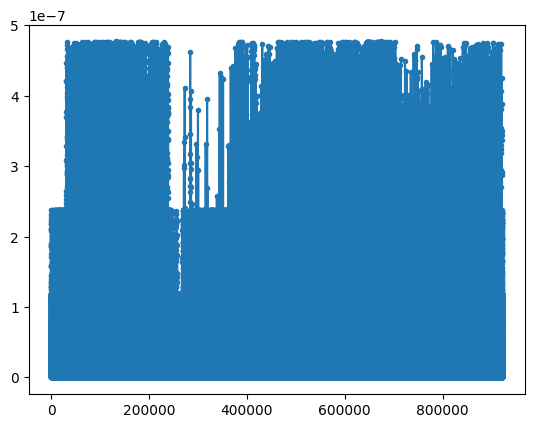

In [11]:
plt.plot(np.abs(den_comp - den_gt), ".-")